EDA DE LOS DATASETS LIMPIOS Y ELECCIÓN DE LAS VARIABLES PARA EL MODELO DE RECOMENDACION

Importar librerias


In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
import herramientas



Leer el archivo de analisis_sentiment


In [171]:
data = pd.read_parquet(r'C:\Users\EFRAIN LINARES\Desktop\Henry PI 1\PI MLOps - STEAM\PARQUET\analisis_sentiment.parquet')

In [172]:
data

,user_id,user_url,posted,item_id,recommend,sentiment_analisys
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,True,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,True,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,True,2
3,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,True,2
4,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,True,2
...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,True,2
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,True,2
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,True,2
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,True,2


In [173]:
# Se calculan la cantidades de los registros

print(f"Cantidad de registros:{data.shape[0]}")

#Revisar los tipos de datos y existencias de valores nulos

herramientas.datos_type(data)

Cantidad de registros:59333


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,user_url,[<class 'str'>],100.00,0.00,0
2,posted,"[<class 'str'>, <class 'NoneType'>]",99.95,0.05,28
3,item_id,"[<class 'str'>, <class 'NoneType'>]",99.95,0.05,28
4,recommend,"[<class 'bool'>, <class 'NoneType'>]",99.95,0.05,28
5,sentiment_analisys,[<class 'int'>],100.00,0.00,0


In [174]:
herramientas.resumen_porcentajes(data,'sentiment_analisys')

,Cantidad,Porcentaje
sentiment_analisys,,
2,50069,84.39
0,8190,13.80
1,1074,1.81


In [175]:
herramientas.resumen_porcentajes(data, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,52473,88.44
False,6832,11.51


In [176]:
#Cantidad de usuarios que dieron su opinion
print(f'Cantidad de usuarios que dieron su opinion: {len(data['user_id'].unique())}')

Cantidad de usuarios que dieron su opinion: 25485


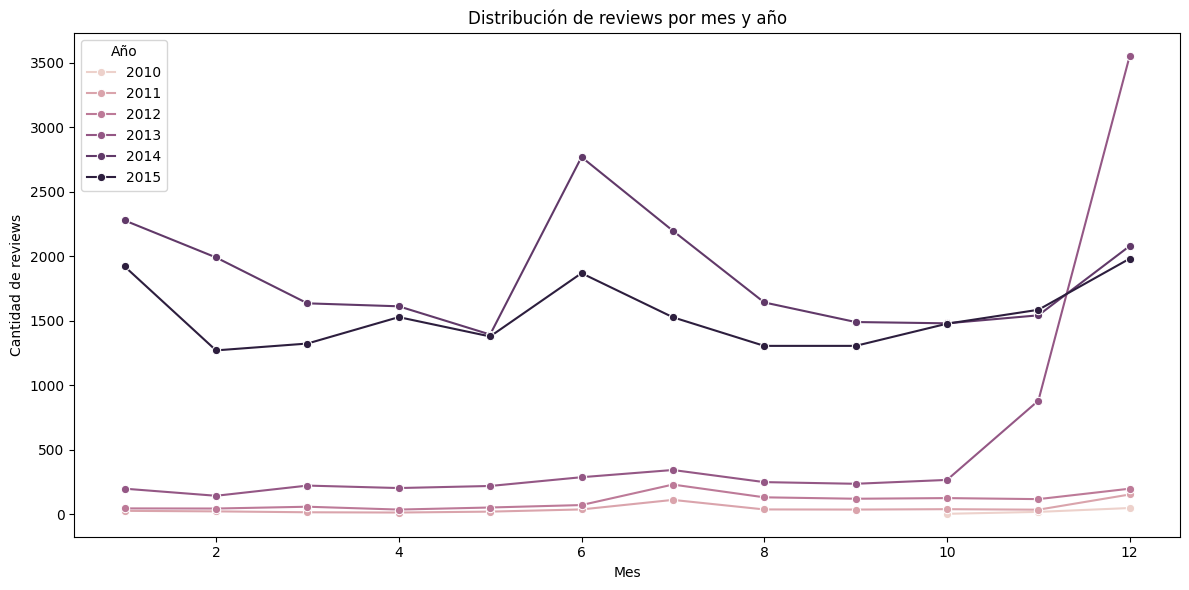

In [177]:
# Extraemos y pasamos las fechas al formato deseado
data["posted"] = data["posted"].str.extract(r'Posted (.+?)\.')
data["posted"] = pd.to_datetime(data["posted"], format="%B %d, %Y", errors='coerce')

# Elimino filas con fechas que no se pudieron convertir
df_reviews = data.dropna(subset=['posted'])

# Agrego columnas para el mes y el año
df_reviews['month'] = df_reviews['posted'].dt.month
df_reviews['year'] = df_reviews['posted'].dt.year

# Calculamos cantidad de reviews por mes y año
df_counts = df_reviews.groupby(['year', 'month']).size().reset_index(name='Cantidad de reviews')

# Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_counts, x="month", y="Cantidad de reviews", hue="year", marker='o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reviews')
plt.title('Distribución de reviews por mes y año')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

EDA del dataset de games_clean

Lectura de datos

In [178]:
df = pd.read_parquet(r'C:\Users\EFRAIN LINARES\Desktop\Henry PI 1\PI MLOps - STEAM\PARQUET\df_games3_clean.parquet')
df

,genres,app_name,release_date,price,id,developer
0,Action,Lost Summoner Kitty,2018.0,4.99,761140,Kotoshiro
1,Indie,Ironbound,2018.0,0.00,643980,Secret Level SRL
2,Casual,Real Pool 3D - Poolians,2017.0,0.00,670290,Poolians.com
3,Action,弹炸人2222,2017.0,0.99,767400,彼岸领域
4,Action,Log Challenge,NaN,2.99,773570,None
...,...,...,...,...,...,...
32130,Casual,Colony On Mars,2018.0,1.99,773640,"Nikita ""Ghost_RUS"""
32131,Casual,LOGistICAL: South Africa,2018.0,4.99,733530,Sacada
32132,Indie,Russian Roads,2018.0,1.99,610660,Laush Dmitriy Sergeevich
32133,Casual,EXIT 2 - Directions,2017.0,4.99,658870,"xropi,stev3ns"


In [179]:
#Se calculan la cantidad de registros
print(f"Cantidad de registros existentes son:{df.shape[0]}")
#Revisar los tipos de datos y existencias de valores nulos

herramientas.datos_type(df)

Cantidad de registros existentes son:32135


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,"[<class 'str'>, <class 'NoneType'>]",99.57,0.43,139
1,app_name,"[<class 'str'>, <class 'NoneType'>]",99.99,0.01,2
2,release_date,[<class 'float'>],92.68,7.32,2352
3,price,[<class 'float'>],100.00,0.00,0
4,id,"[<class 'str'>, <class 'NoneType'>]",99.99,0.01,2
5,developer,"[<class 'str'>, <class 'NoneType'>]",89.94,10.06,3234


In [180]:
total_games = len(df['id'].unique())
print(f'Hay un total de juegos unicos de: {total_games}')

Hay un total de juegos unicos de: 32133


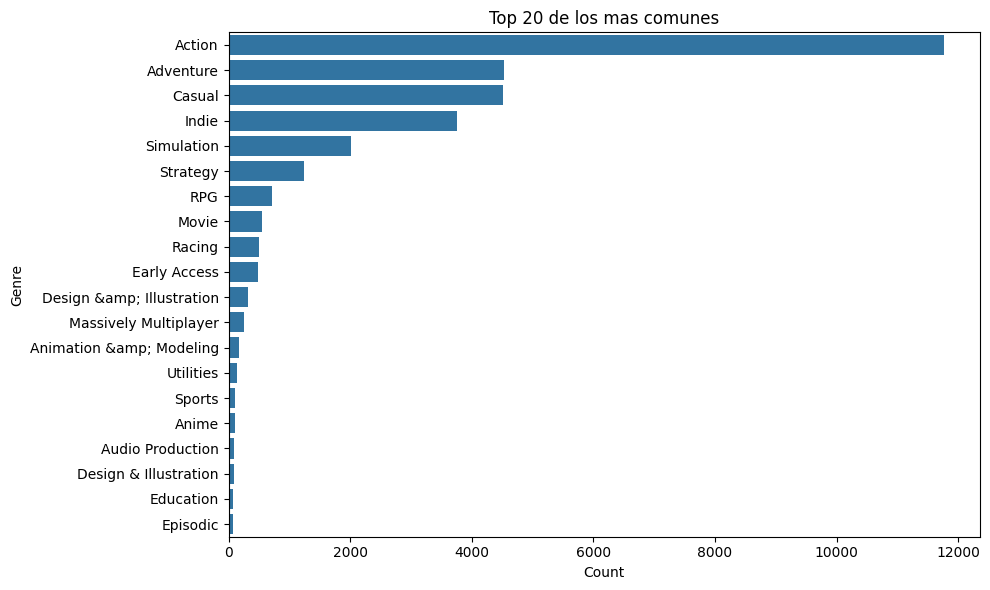

In [181]:
#Calcular la frecuencia de cada genero
genre_contar = df['genres'].value_counts()

#seleccionar los 20 generos mas comunes
top_genres = genre_contar.head(20)

#Crear un DataFrame con los generos mas comunes y sus frecuencias

top_genres_df = pd.DataFrame({'Genre': top_genres.index,'Count': top_genres.values})

#Graficar los mas comunes generos

plt.figure(figsize=(10,6))
sns.barplot(data=top_genres_df, x="Count", y="Genre")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Top 20 de los mas comunes")
plt.tight_layout()
plt.show()

In [182]:
Genres_porcent = herramientas.resumen_porcentajes(df,'genres')
Genres_porcent.head(20)

,Cantidad,Porcentaje
genres,,
Action,11770,36.63
Adventure,4530,14.10
Casual,4521,14.07
Indie,3763,11.71
Simulation,2019,6.28
Strategy,1245,3.87
RPG,718,2.23
Movie,552,1.72
Racing,504,1.57


COLUMNA 'RELEASE_DATE'

In [183]:
herramientas.resumen_porcentajes(df,'release_date')

,Cantidad,Porcentaje
release_date,,
2017.0,9518,29.62
2016.0,6933,21.57
2015.0,4945,15.39
2014.0,2832,8.81
2013.0,1551,4.83
2012.0,1192,3.71
2011.0,589,1.83
2010.0,436,1.36
2009.0,337,1.05


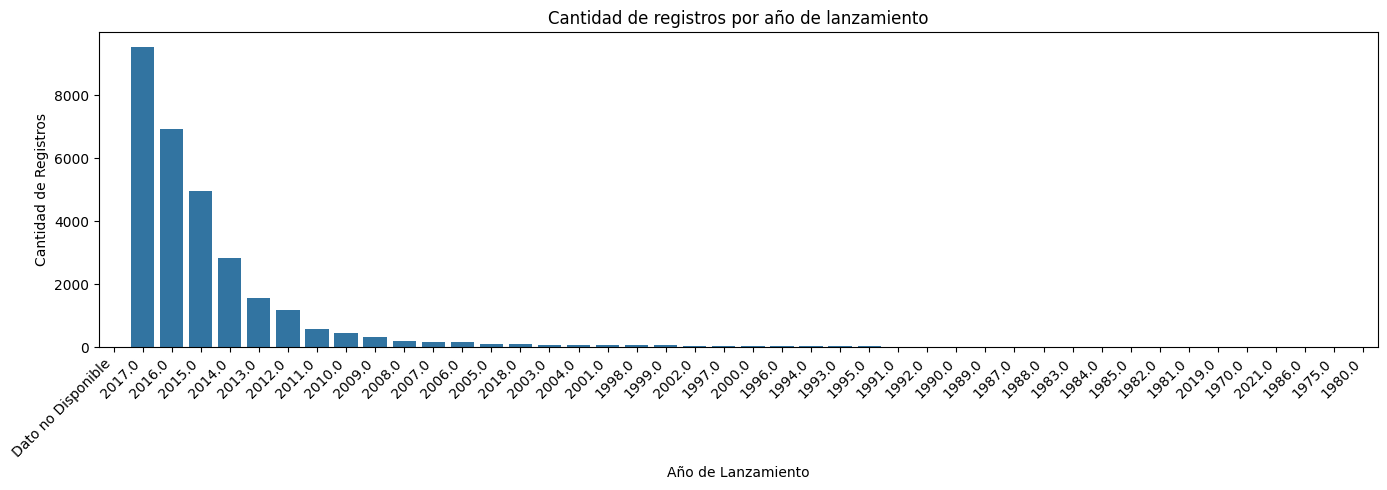

In [184]:
#Cuenta la frecuencia de cada year
count_year = df['release_date'].value_counts()

#ordenar los valores para que los "Datos no disponibles" queden al principio o al final
count_year = count_year.reindex(['Dato no Disponible'] + list(count_year.index))



#Crear Graficos
plt.figure(figsize=(14,5))
sns.barplot(x=count_year.index, y= count_year.values)
plt.xlabel('Año de Lanzamiento') 
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de registros por año de lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

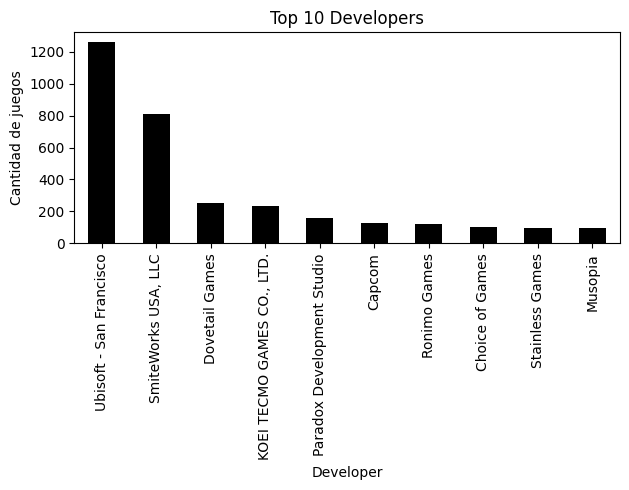

In [185]:
#contar la cantidad de juegos por developer
count_developer = df['developer'].value_counts()

#Crear una figura con dos subplots uno al lado de otro
plt.figure(figsize=(12,5))

#segundo subplot para developer
plt.subplot(1,2,2)
count_developer[:10].plot(kind='bar', color='black')
plt.xlabel('Developer')
plt.ylabel('Cantidad de juegos')
plt.title('Top 10 Developers')
plt.tight_layout()
plt.show()


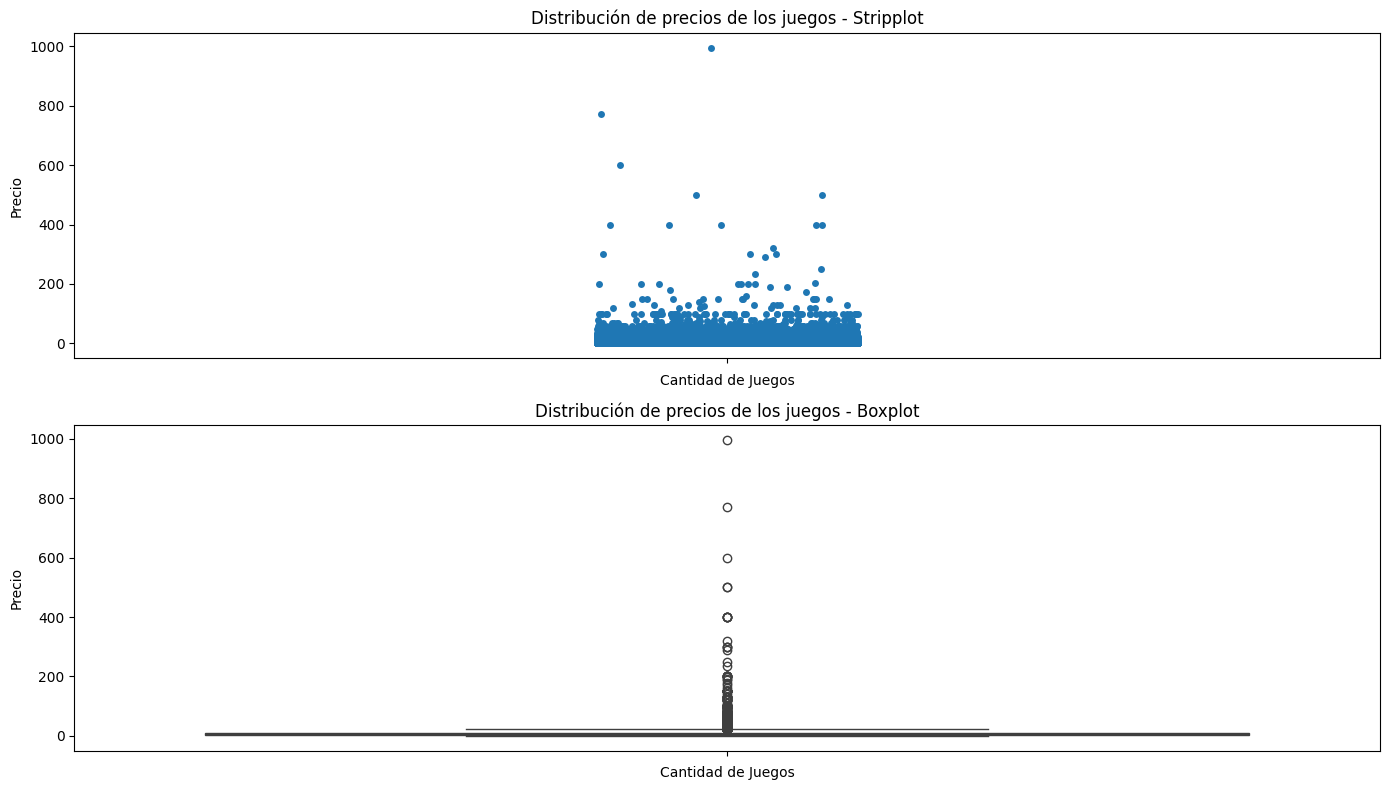

In [186]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df['price'].unique()
df_precio_unicos = df['price']
df_precios_uni = pd.DataFrame(df_precio_unicos, columns=['price'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

sns.stripplot(data=df_precios_uni, y='price', ax=ax1)
ax1.set_ylabel('Precio')
ax1.set_xlabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos - Stripplot')

sns.boxplot(data=df_precios_uni, y='price', ax=ax2)
ax2.set_ylabel('Precio')
ax2.set_xlabel('Cantidad de Juegos')
ax2.set_title('Distribución de precios de los juegos - Boxplot')

# Muestra y ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()

In [187]:
# Valores estadísticos básicos para stripplot
precio_minimo = df_precios_uni['price'].min()
precio_maximo = df_precios_uni['price'].max()
precio_mediana = df_precios_uni['price'].median()
precio_promedio = df_precios_uni['price'].mean()

print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")
print(f"Mediana de precios: {precio_mediana}")
print(f"Promedio de precios: {precio_promedio}")

Precio mínimo: 0.0
Precio máximo: 995.0
Mediana de precios: 4.99
Promedio de precios: 8.486905865878326


In [188]:
# Valores estadísticos básicos para boxplot
cuartiles = df_precios_uni['price'].quantile([0.25, 0.5, 0.75])
precio_cuartil1 = cuartiles[0.25]
precio_cuartil2 = cuartiles[0.5]
precio_cuartil3 = cuartiles[0.75]
precio_IQR = precio_cuartil3 - precio_cuartil1

print(f"Precio primer cuartil: {precio_cuartil1}")
print(f"Precio segundo cuartil (mediana): {precio_cuartil2}")
print(f"Precio tercer cuartil: {precio_cuartil3}")
print(f"Rango intercuartílico (IQR): {precio_IQR}")

Precio primer cuartil: 1.99
Precio segundo cuartil (mediana): 4.99
Precio tercer cuartil: 9.99
Rango intercuartílico (IQR): 8.0


EDA del dataset users_items

In [190]:
df_items = pd.read_parquet(r'C:\Users\EFRAIN LINARES\Desktop\Henry PI 1\PI MLOps - STEAM\PARQUET\df_items_clean.parquet')
df_items.head()

,user_id,items_count,item_id,playtime_forever
0,76561197970982479,277,10,6.0
1,76561197970982479,277,20,0.0
2,76561197970982479,277,30,7.0
3,76561197970982479,277,40,0.0
4,76561197970982479,277,50,0.0


In [192]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
herramientas.datos_type(df_items)

La cantidad de registros que hay son: 5170015


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.00,0.00,0
1,items_count,[<class 'int'>],100.00,0.00,0
2,item_id,"[<class 'str'>, <class 'NoneType'>]",99.67,0.33,16806
3,playtime_forever,[<class 'float'>],99.67,0.33,16806


columna 'playtime_forever'

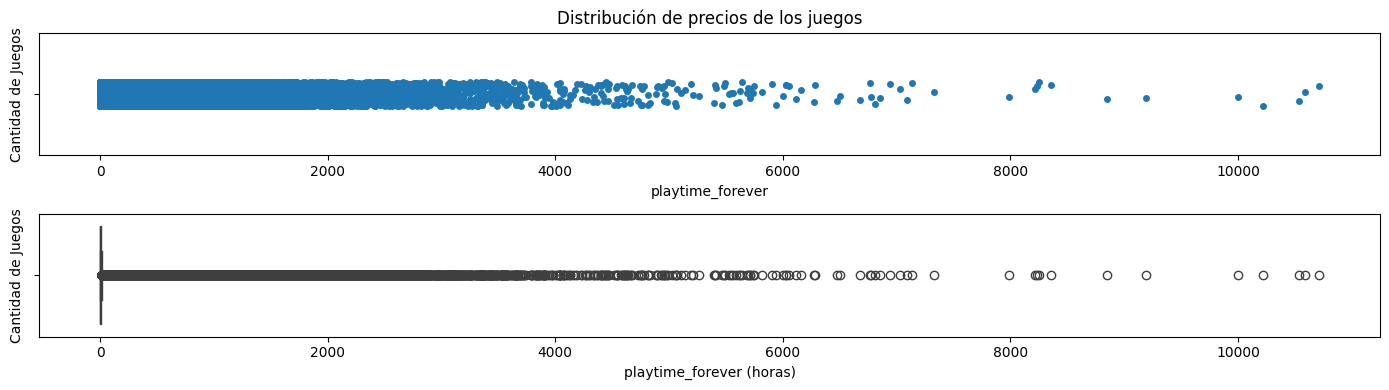

In [193]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [194]:
# Valores estadísticos básicos para stripplot
playtime_min = df_items['playtime_hours'].min()
playtime_max = df_items['playtime_hours'].max()
playtime_mediana = df_items['playtime_hours'].median()
playtime_promedio = df_items['playtime_hours'].mean()

print(f"Tiempo mínimo de juego (horas): {playtime_min}")
print(f"Tiempo máximo de juego (horas): {playtime_max}")
print(f"Mediana del tiempo de juego (horas): {playtime_mediana}")
print(f"Promedio del tiempo de juego (horas): {playtime_promedio}")

Tiempo mínimo de juego (horas): 0.0
Tiempo máximo de juego (horas): 10712.883333333333
Mediana del tiempo de juego (horas): 0.5666666666666667
Promedio del tiempo de juego (horas): 16.524919013246567


In [195]:
# Valores estadísticos básicos para boxplot
cuartiles_playtime = df_items['playtime_hours'].quantile([0.25, 0.5, 0.75])
playtime_cuartil1 = cuartiles_playtime[0.25]
playtime_cuartil2 = cuartiles_playtime[0.5]
playtime_cuartil3 = cuartiles_playtime[0.75]
playtime_IQR = playtime_cuartil3 - playtime_cuartil1

print(f"Cuartil 1 del tiempo de juego (horas): {playtime_cuartil1}")
print(f"Cuartil 2 del tiempo de juego (horas): {playtime_cuartil2}")
print(f"Cuartil 3 del tiempo de juego (horas): {playtime_cuartil3}")
print(f"Rango intercuartílico (IQR) del tiempo de juego (horas): {playtime_IQR}")

Cuartil 1 del tiempo de juego (horas): 0.0
Cuartil 2 del tiempo de juego (horas): 0.5666666666666667
Cuartil 3 del tiempo de juego (horas): 5.916666666666667
Rango intercuartílico (IQR) del tiempo de juego (horas): 5.916666666666667


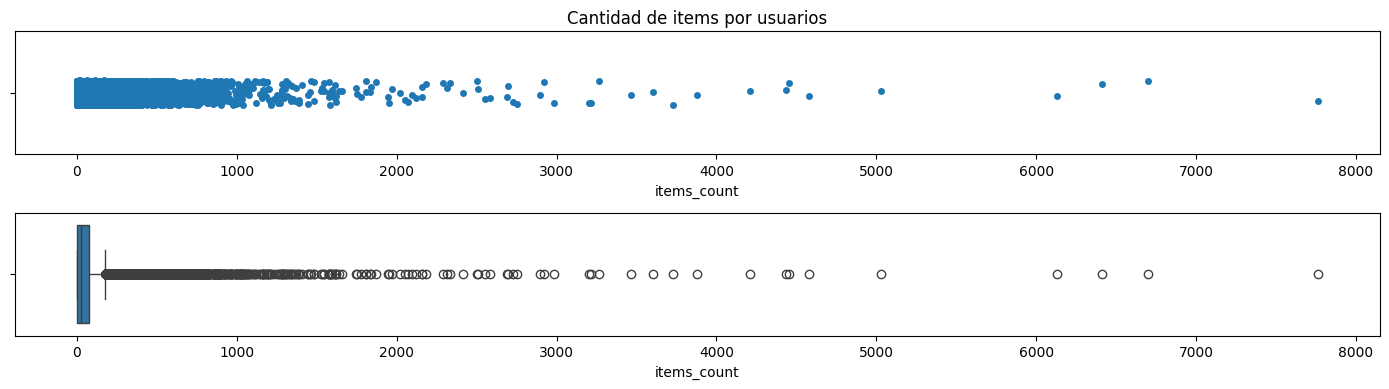

In [196]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [198]:
# Check if the column 'genres' exists in the DataFrame
if 'genres' in df.columns:
    print("The column 'genres' exists in the DataFrame.")
else:
    print("The column 'genres' does not exist in the DataFrame.")

# Display the DataFrame's columns
print("\nDataFrame columns:")
print(df.columns)

# Display the DataFrame's head to verify its structure
print("\nDataFrame head:")
print(df.head())

The column 'genres' exists in the DataFrame.

DataFrame columns:
Index(['genres', 'app_name', 'release_date', 'price', 'id', 'developer'], dtype='object')

DataFrame head:
   genres                 app_name  release_date  price      id  \
0  Action      Lost Summoner Kitty        2018.0   4.99  761140   
1   Indie                Ironbound        2018.0   0.00  643980   
2  Casual  Real Pool 3D - Poolians        2017.0   0.00  670290   
3  Action                  弹炸人2222        2017.0   0.99  767400   
4  Action            Log Challenge           NaN   2.99  773570   

          developer  
0         Kotoshiro  
1  Secret Level SRL  
2      Poolians.com  
3              彼岸领域  
4              None  


ELECCION DE LAS VARIABLES A USAR EN EL MODELO DE RECOMENDACION

In [200]:
# Convertir los valores de los géneros a columnas usando one-hot encoding
genres_dummies = pd.get_dummies(df['genres'])

# Concatenar los DataFrames
df_games = pd.concat([df, genres_dummies], axis=1)

# Eliminar la columna 'genres' ya que no la necesitamos más
df_games.drop(columns=['genres'], inplace=True)

# Renombrar las columnas de los géneros para que coincidan con el formato deseado
genre_columns = {
    "Action": "Accounting",
    "Indie": "Adventure",
    "Casual": "Animation & Modeling",
    # Añadir aquí los demás géneros...
}
df_games.rename(columns=genre_columns, inplace=True)

# Cambiar True por 1 y False por 0 en todas las columnas del DataFrame
df_games.replace({True: 1, False: 0}, inplace=True)

df_games

,app_name,release_date,price,id,developer,,360 Video,Accounting,Accounting,Adventure,...,Tutorial,Twin Stick Shooter,Utilities,VR,Video Production,Violent,War,Web Publishing,World War II,Zombies
0,Lost Summoner Kitty,2018.0,4.99,761140,Kotoshiro,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,2018.0,0.00,643980,Secret Level SRL,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,2017.0,0.00,670290,Poolians.com,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,2017.0,0.99,767400,彼岸领域,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Log Challenge,NaN,2.99,773570,None,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Colony On Mars,2018.0,1.99,773640,"Nikita ""Ghost_RUS""",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32131,LOGistICAL: South Africa,2018.0,4.99,733530,Sacada,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32132,Russian Roads,2018.0,1.99,610660,Laush Dmitriy Sergeevich,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32133,EXIT 2 - Directions,2017.0,4.99,658870,"xropi,stev3ns",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
